In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Data Exploration

In [2]:
df = pd.read_csv('data/olympics_dataset.csv')

In [3]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [8]:
df.describe()

,player_id,Year
count,2.525650e+05,252565.000000
mean,2.305499e+05,1981.743908
std,4.289330e+05,32.596548
min,0.000000e+00,1896.000000
25%,5.713700e+04,1960.000000
50%,1.356110e+05,1988.000000
75%,2.118590e+05,2008.000000
max,9.460001e+06,2024.000000


# 2. Data Cleaning and Preparation

#### Checking if there are NULL values

In [11]:
df.isna().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

### making all the column names lowercase for better consistency

In [18]:
mapper = {}
for column in df.columns:
    mapper[column] = column.lower()
df.rename(mapper=mapper,axis=1,inplace=True)

# Data Aggregation and Summarization

### The total number of medals won by each country

In [20]:
df.head()

,player_id,name,sex,team,noc,year,season,city,sport,event,medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [22]:
df['medalwon'] = np.where(df['medal']!='No medal',1,0)

In [28]:
medals_won_by_country = df.groupby('noc')['medalwon'].sum().reset_index().sort_values(by='medalwon',ascending=False)

In [29]:
medals_won_by_country.head()

,noc,medalwon
220,USA,5621
76,GBR,2282
218,URS,2063
81,GER,1968
71,FRA,1955


<Axes: xlabel='noc', ylabel='medalwon'>

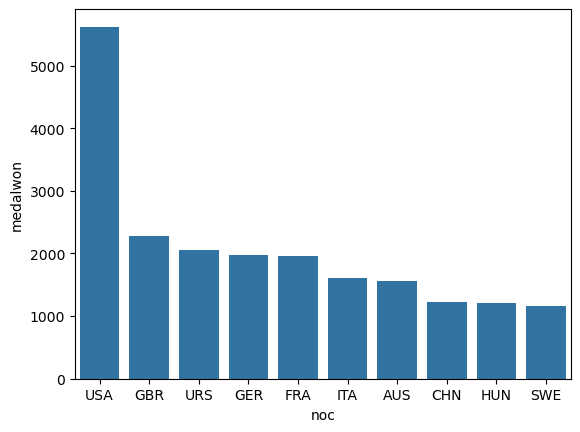

In [32]:
fig = plt.figure()
sns.barplot(data= medals_won_by_country.head(10),x='noc',y='medalwon')

### average number of medals won per year for each sport

In [39]:
df.groupby(['sport','year'])['medalwon'].sum().reset_index()

,sport,year,medalwon
0,3x3 Basketball,2020,24
1,3x3 Basketball,2024,24
2,"3x3 Basketball, Basketball",2024,0
3,Aeronautics,1936,1
4,Alpinism,1932,2
...,...,...,...
763,Wrestling,2008,71
764,Wrestling,2012,72
765,Wrestling,2016,72
766,Wrestling,2020,72


In [48]:
average_number_of_medals = df.groupby(['sport', 'year']).size().reset_index(name='Medal_Count')

In [50]:
average_number_of_medals = average_number_of_medals.groupby('sport')['Medal_Count'].mean().round(2).reset_index()

In [51]:
average_number_of_medals

,sport,Medal_Count
0,3x3 Basketball,64.00
1,"3x3 Basketball, Basketball",1.00
2,Aeronautics,1.00
3,Alpinism,2.00
4,Archery,158.11
...,...,...
71,Tug-Of-War,28.33
72,Volleyball,250.19
73,Water Polo,152.34
74,Weightlifting,152.00


### percentage of gold,silver,or bronze medals won by country

In [53]:
df['goldmedal'] = np.where(df['medal']=='Gold',1,0)
df['silvermedal'] = np.where(df['medal']=='Silver',1,0)
df['bronzemedal'] = np.where(df['medal']=='Bronze',1,0)

In [73]:
def find_percentage(medal):
    return df.groupby('noc').apply(lambda x : x[f'{medal}medal'].sum() / x['medalwon'].sum(),include_groups=False).sort_values(ascending=False).reset_index(name=f'{medal}_won').dropna()

In [74]:
find_percentage('gold')

/var/folders/7z/ybvl4jx52sb5dmm0p2j2lf5h0000gn/T/ipykernel_16003/1859252537.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return df.groupby('noc').apply(lambda x : x[f'{medal}medal'].sum() / x['medalwon'].sum(),include_groups=False).sort_values(ascending=False).reset_index(name=f'{medal}_won').dropna()


,noc,gold_won
0,DMA,1.000000
1,CMR,0.909091
2,ZIM,0.772727
3,ANZ,0.689655
4,LUX,0.666667
...,...,...
152,LIB,0.000000
153,BUR,0.000000
154,TAN,0.000000
155,KUW,0.000000


In [75]:
find_percentage('silver')

/var/folders/7z/ybvl4jx52sb5dmm0p2j2lf5h0000gn/T/ipykernel_16003/1859252537.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return df.groupby('noc').apply(lambda x : x[f'{medal}medal'].sum() / x['medalwon'].sum(),include_groups=False).sort_values(ascending=False).reset_index(name=f'{medal}_won').dropna()


,noc,silver_won
0,GAB,1.0
1,MNE,1.0
2,AHO,1.0
3,ISV,1.0
4,SEN,1.0
...,...,...
152,MON,0.0
153,SUR,0.0
154,MOZ,0.0
155,MRI,0.0


In [76]:
find_percentage('bronze')

/var/folders/7z/ybvl4jx52sb5dmm0p2j2lf5h0000gn/T/ipykernel_16003/1859252537.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return df.groupby('noc').apply(lambda x : x[f'{medal}medal'].sum() / x['medalwon'].sum(),include_groups=False).sort_values(ascending=False).reset_index(name=f'{medal}_won').dropna()


,noc,bronze_won
0,AFG,1.0
1,KUW,1.0
2,BUR,1.0
3,EOR,1.0
4,ERI,1.0
...,...,...
152,AHO,0.0
153,GAB,0.0
154,TKM,0.0
155,TGA,0.0


### Top ten athletes based on the ammount of medals won

In [78]:
df.groupby('name')['medalwon'].sum().sort_values(ascending=False).reset_index().head(10)

,name,medalwon
0,Michael Ii,28
1,Larysa (diriy-),18
2,Charles Jr.,16
3,Nikolay Andrianov,15
4,Takashi Ono,13
5,Gustaf Carlberg,13
6,Edoardo Mangiarotti,13
7,Borys Shakhlin,13
8,John Jr.,13
9,Aleksey Nemov,12


### Gender distribution between male and female

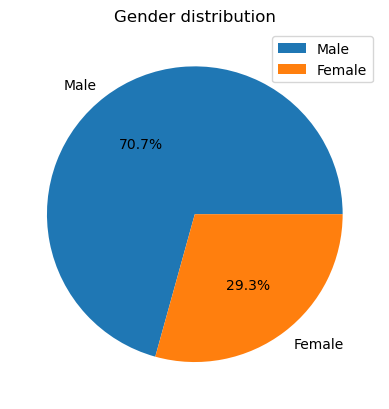

In [92]:
plt.pie(x=[len(df[df['sex']=='M']),len(df[df['sex']=='F'])],labels=['Male','Female'],autopct='%1.1f%%')
plt.legend()
plt.title('Gender distribution')
plt.show()

### Number of the unique sports held each year

In [97]:
unique_sport = df.groupby('year')['sport'].nunique()

<Axes: xlabel='year', ylabel='sport'>

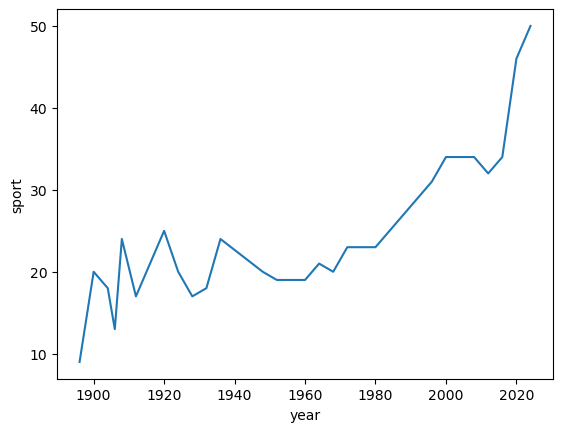

In [98]:
sns.lineplot(data=unique_sport)